### The goal of this project to find an ideal model to predict whether an Home Equity Loan will Default or will it be paid off.

# The data was obtained from kaggle.
# Here is a link to the dataset-https://www.kaggle.com/datasets/ajay1735/hmeq-data


### The data is a classification dataset and I will be running three different supervised machine learning models, which are Logistic Regression, Random Forest Classifier, and Gradient Boosting Classifier.

### Import the neccesary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import warnings
import itertools

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.metrics import mean_absolute_error
from statsmodels.tools.eval_measures import mse, rmse
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, roc_auc_score

warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
hmeq_df = pd.read_csv('/content/hmeq.csv')

### We see that are dataset has missing values so we will need to address before we run our machine learning models.

In [3]:
hmeq_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      5960 non-null   int64  
 1   LOAN     5960 non-null   int64  
 2   MORTDUE  5442 non-null   float64
 3   VALUE    5848 non-null   float64
 4   REASON   5708 non-null   object 
 5   JOB      5681 non-null   object 
 6   YOJ      5445 non-null   float64
 7   DEROG    5252 non-null   float64
 8   DELINQ   5380 non-null   float64
 9   CLAGE    5652 non-null   float64
 10  NINQ     5450 non-null   float64
 11  CLNO     5738 non-null   float64
 12  DEBTINC  4693 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 605.4+ KB


In [4]:
hmeq_df

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5955,0,88900,57264.0,90185.0,DebtCon,Other,16.0,0.0,0.0,221.808718,0.0,16.0,36.112347
5956,0,89000,54576.0,92937.0,DebtCon,Other,16.0,0.0,0.0,208.692070,0.0,15.0,35.859971
5957,0,89200,54045.0,92924.0,DebtCon,Other,15.0,0.0,0.0,212.279697,0.0,15.0,35.556590
5958,0,89800,50370.0,91861.0,DebtCon,Other,14.0,0.0,0.0,213.892709,0.0,16.0,34.340882


### Doing some research in underwritting knowing the Loan to Value ratio is important so I created a new variable called LTV

In [5]:
hmeq_df['LTV'] = (hmeq_df['MORTDUE'] + hmeq_df['LOAN']) / hmeq_df['VALUE']

In [6]:
hmeq_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      5960 non-null   int64  
 1   LOAN     5960 non-null   int64  
 2   MORTDUE  5442 non-null   float64
 3   VALUE    5848 non-null   float64
 4   REASON   5708 non-null   object 
 5   JOB      5681 non-null   object 
 6   YOJ      5445 non-null   float64
 7   DEROG    5252 non-null   float64
 8   DELINQ   5380 non-null   float64
 9   CLAGE    5652 non-null   float64
 10  NINQ     5450 non-null   float64
 11  CLNO     5738 non-null   float64
 12  DEBTINC  4693 non-null   float64
 13  LTV      5357 non-null   float64
dtypes: float64(10), int64(2), object(2)
memory usage: 652.0+ KB


In [7]:
hmeq_df

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,LTV
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN,0.690839
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN,1.043173
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN,0.898204
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN,0.888393
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5955,0,88900,57264.0,90185.0,DebtCon,Other,16.0,0.0,0.0,221.808718,0.0,16.0,36.112347,1.620713
5956,0,89000,54576.0,92937.0,DebtCon,Other,16.0,0.0,0.0,208.692070,0.0,15.0,35.859971,1.544874
5957,0,89200,54045.0,92924.0,DebtCon,Other,15.0,0.0,0.0,212.279697,0.0,15.0,35.556590,1.541529
5958,0,89800,50370.0,91861.0,DebtCon,Other,14.0,0.0,0.0,213.892709,0.0,16.0,34.340882,1.525892


### Considering our data is missing a lot of values and I do not want incorrect data, I choose to drop all the rows that contain a missing value. Our new dataset has 3364 rows which should suffice for making our model. I am concern with the number of values where the Loan defaulted which is 300, because the models we use might not have enough training data to accurately pick test values. Having more data should improve the model significantly for future reference.

In [8]:
hmeq_df = hmeq_df.dropna()

In [9]:
hmeq_df

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,LTV
5,1,1700,30548.0,40320.0,HomeImp,Other,9.0,0.0,0.0,101.466002,1.0,8.0,37.113614,0.799802
7,1,1800,28502.0,43034.0,HomeImp,Other,11.0,0.0,0.0,88.766030,0.0,8.0,36.884894,0.704141
19,0,2300,102370.0,120953.0,HomeImp,Office,2.0,0.0,0.0,90.992533,0.0,13.0,31.588503,0.865377
25,1,2400,34863.0,47471.0,HomeImp,Mgr,12.0,0.0,0.0,70.491080,1.0,21.0,38.263601,0.784963
26,0,2400,98449.0,117195.0,HomeImp,Office,4.0,0.0,0.0,93.811775,0.0,13.0,29.681827,0.860523
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5955,0,88900,57264.0,90185.0,DebtCon,Other,16.0,0.0,0.0,221.808718,0.0,16.0,36.112347,1.620713
5956,0,89000,54576.0,92937.0,DebtCon,Other,16.0,0.0,0.0,208.692070,0.0,15.0,35.859971,1.544874
5957,0,89200,54045.0,92924.0,DebtCon,Other,15.0,0.0,0.0,212.279697,0.0,15.0,35.556590,1.541529
5958,0,89800,50370.0,91861.0,DebtCon,Other,14.0,0.0,0.0,213.892709,0.0,16.0,34.340882,1.525892


In [10]:
hmeq_df['BAD'].value_counts()

0    3064
1     300
Name: BAD, dtype: int64

Text(0.5, 1.0, 'Correlation Matix of Home Equity Loans')

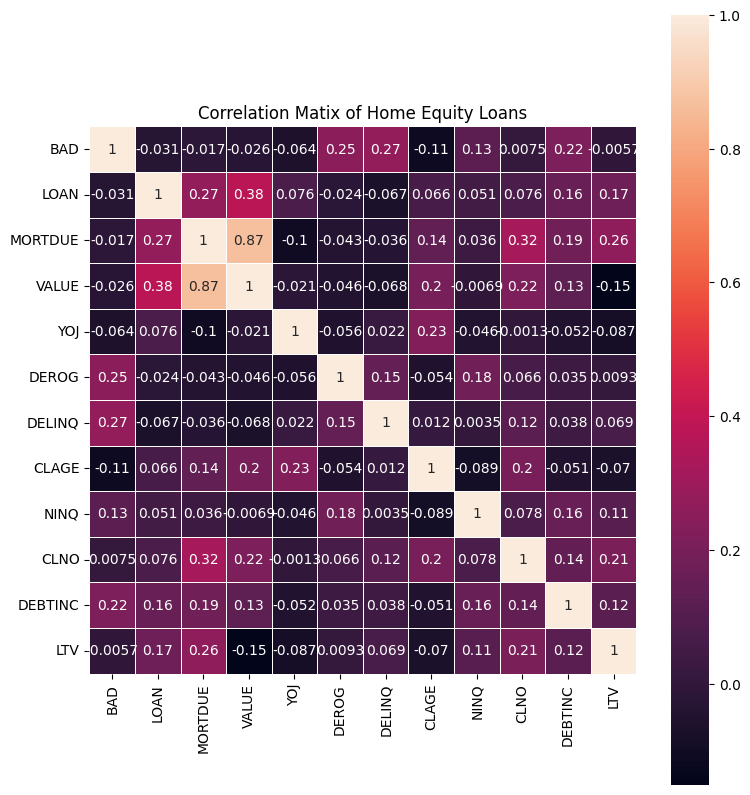

In [13]:
# Correlation Plot
corrmat_hmeq = hmeq_df.corr()

plt.figure(figsize= (30, 10))

plt.subplot(1, 3, 1)
sns.heatmap(corrmat_hmeq, square= True, annot= True, linewidths= .5)
plt.title("Correlation Matix of Home Equity Loans")

### Encode significant categorical variables.

In [ ]:
categorical = []

for column in hmeq_df.columns:
  if len(hmeq_df[column].unique()) < 50:
    categorical.append(column)

In [ ]:
from scipy import stats

def barplots(categorical, target):
  i = 0
  title = "Average of: " + str(target)

  while i < len(categorical):
    plt.figure(figsize = (18, 6))

    plt.subplot(1, 3, 1)
    sns.barplot(x = hmeq_df[categorical[i]], y = hmeq_df[target])
    plt.setp(plt.gca().get_xticklabels(), rotation= 45, horizontalalignment= 'right')
    plt.title(title)

    if i+1 < len(categorical):
      plt.subplot(1, 3, 2)
      sns.barplot(x = hmeq_df[categorical[i+1]], y = hmeq_df[target])
      plt.setp(plt.gca().get_xticklabels(), rotation= 45, horizontalalignment= 'right')
      plt.title(title)

    if i+2 < len(categorical):
      plt.subplot(1, 3, 3)
      sns.barplot(x = hmeq_df[categorical[i+2]], y = hmeq_df[target])
      plt.setp(plt.gca().get_xticklabels(), rotation= 45, horizontalalignment= 'right')
      plt.title(title)

    plt.show()

    i += 3

def statdifference(catvariables, target):

  for categoricalvar in catvariables:
    values = hmeq_df[categoricalvar].unique()

    print("*----------------------------------*")
    print("Comaprison of variables: {} and {}".format(target, categoricalvar))
    print("*----------------------------------*")

    for i in range(0, len(values)):
      for j in range(i+1, len(values)):
        print("t-test between groups {0} and {1}: ".format(values[i], values[j]))
        print(stats.ttest_ind(hmeq_df[hmeq_df[categoricalvar]==values[i]][target], hmeq_df[hmeq_df[categoricalvar]==values[j]][target]))

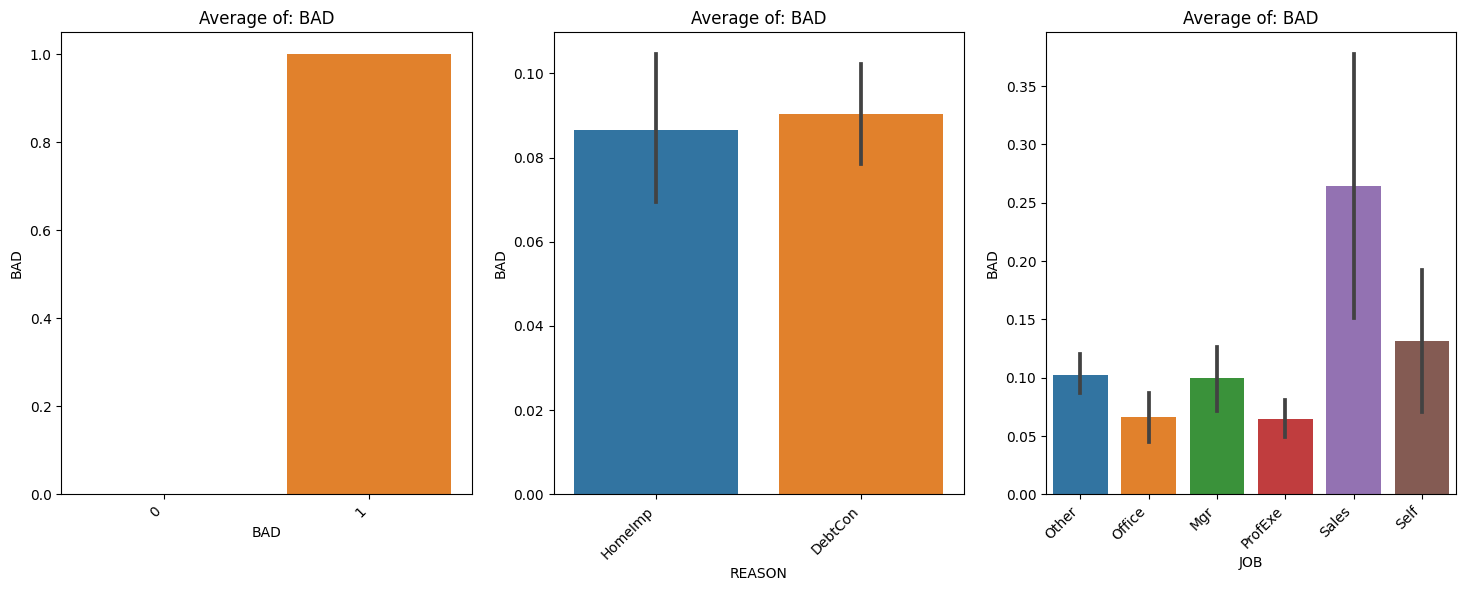

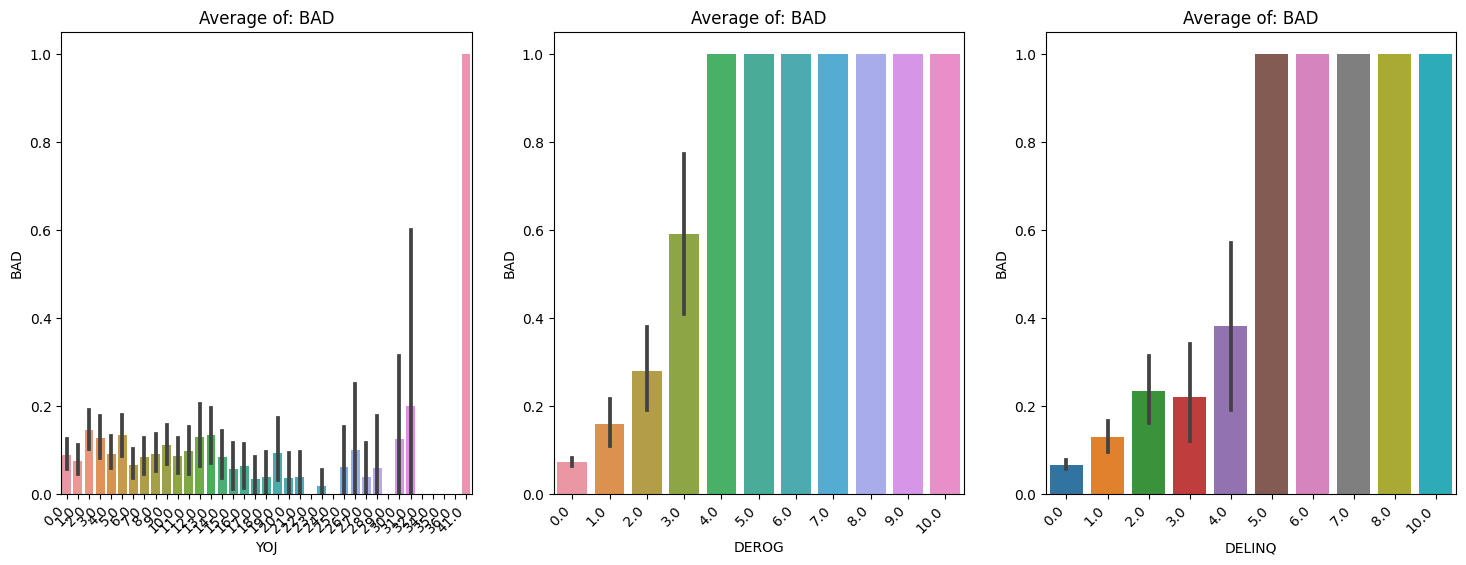

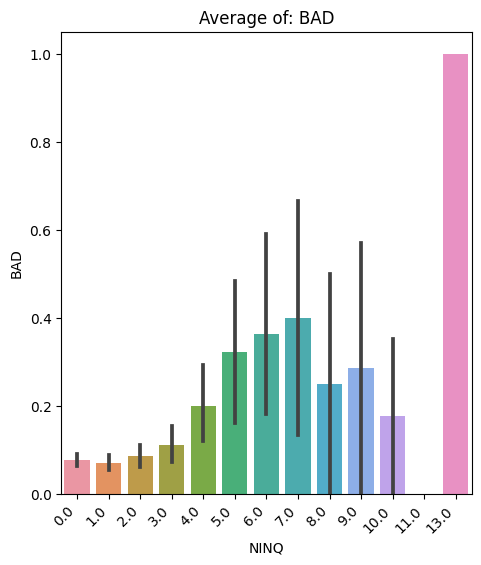

In [ ]:
barplots(categorical, 'BAD')

### The job, years of job, number od derogatory reports, number of delinquent credit lines, and NINQ have significant differences between groups. Confirmed results with t-test.

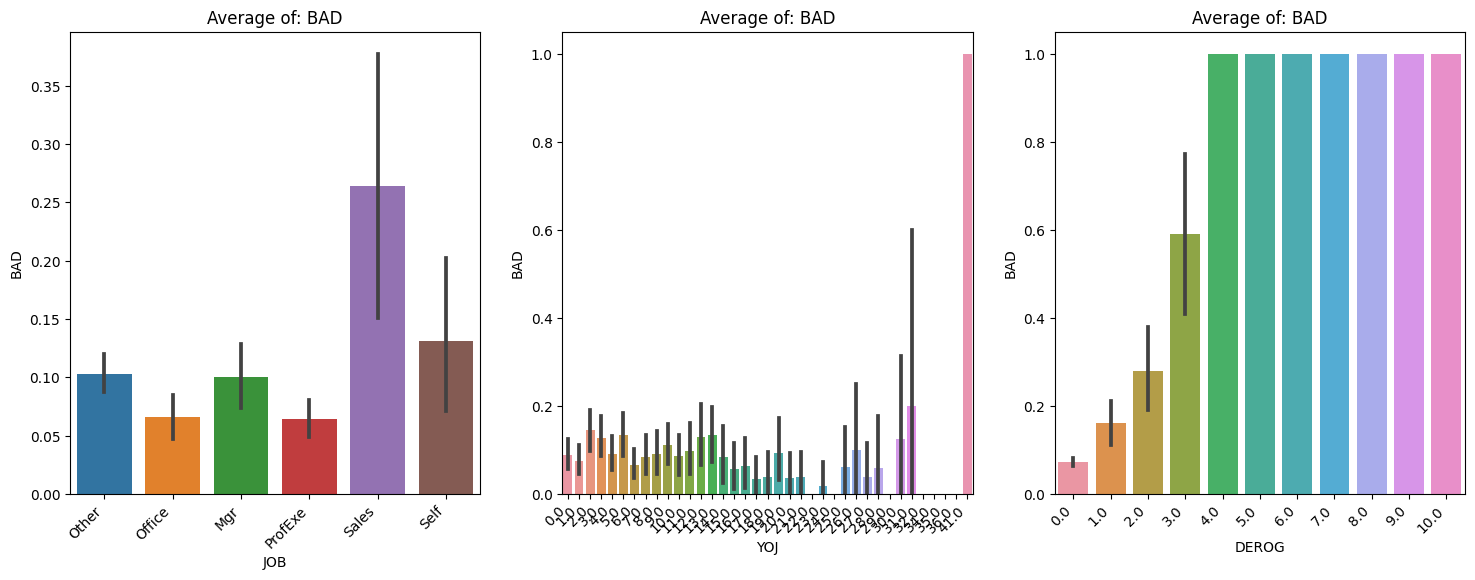

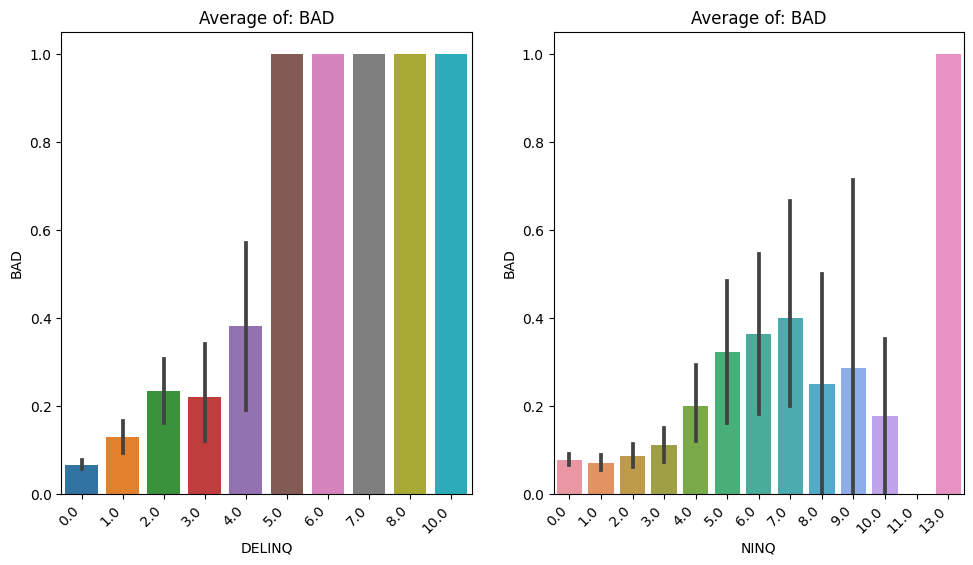

In [ ]:
selectedvars = ['JOB', 'YOJ', 'DEROG', 'DELINQ', 'NINQ']

barplots(selectedvars, 'BAD')

In [ ]:
statdifference(selectedvars, 'BAD')

*----------------------------------*
Comaprison of variables: BAD and JOB
*----------------------------------*
t-test between groups Other and Office: 
TtestResult(statistic=2.5525236348633156, pvalue=0.01077379721802406, df=1861.0)
t-test between groups Other and Mgr: 
TtestResult(statistic=0.15943465584996977, pvalue=0.8733450046182616, df=1734.0)
t-test between groups Other and ProfExe: 
TtestResult(statistic=3.1180625512302376, pvalue=0.001844177395643381, df=2183.0)
t-test between groups Other and Sales: 
TtestResult(statistic=-3.7131877664843462, pvalue=0.00021308507423624563, df=1337.0)
t-test between groups Other and Self: 
TtestResult(statistic=-0.8974235144356362, pvalue=0.3696491640207745, df=1383.0)
t-test between groups Office and Mgr: 
TtestResult(statistic=-1.9937096873311306, pvalue=0.046448433416734373, df=1025.0)
t-test between groups Office and ProfExe: 
TtestResult(statistic=0.10193342100817943, pvalue=0.9188233861958964, df=1474.0)
t-test between groups Office and 

### Encoded categorical variables.

In [ ]:
dummy_column_names = []

for varcat in selectedvars:

  dropFirst = False

  if len(hmeq_df[varcat].unique()) == 2:
    dropFirst = True

  hmeq_df = pd.concat([hmeq_df, pd.get_dummies(hmeq_df[varcat], prefix= varcat, drop_first=dropFirst)], axis= 1)
  dummy_column_names = dummy_column_names + list(pd.get_dummies(hmeq_df[varcat], prefix= varcat, drop_first=dropFirst).columns)

In [ ]:
hmeq_df['YOJ'].unique()

array([ 9., 11.,  2., 12.,  4.,  1., 16.,  7.,  6., 20.,  5., 21., 19.,
        3., 14.,  8.,  0., 22., 23., 10., 18., 24., 29., 31., 13., 15.,
       25., 28., 17., 26., 30., 27., 41., 35., 36., 34., 32.])

In [ ]:
dummy_column_names

['JOB_Mgr',
 'JOB_Office',
 'JOB_Other',
 'JOB_ProfExe',
 'JOB_Sales',
 'JOB_Self',
 'YOJ_0.0',
 'YOJ_1.0',
 'YOJ_2.0',
 'YOJ_3.0',
 'YOJ_4.0',
 'YOJ_5.0',
 'YOJ_6.0',
 'YOJ_7.0',
 'YOJ_8.0',
 'YOJ_9.0',
 'YOJ_10.0',
 'YOJ_11.0',
 'YOJ_12.0',
 'YOJ_13.0',
 'YOJ_14.0',
 'YOJ_15.0',
 'YOJ_16.0',
 'YOJ_17.0',
 'YOJ_18.0',
 'YOJ_19.0',
 'YOJ_20.0',
 'YOJ_21.0',
 'YOJ_22.0',
 'YOJ_23.0',
 'YOJ_24.0',
 'YOJ_25.0',
 'YOJ_26.0',
 'YOJ_27.0',
 'YOJ_28.0',
 'YOJ_29.0',
 'YOJ_30.0',
 'YOJ_31.0',
 'YOJ_32.0',
 'YOJ_34.0',
 'YOJ_35.0',
 'YOJ_36.0',
 'YOJ_41.0',
 'DEROG_0.0',
 'DEROG_1.0',
 'DEROG_2.0',
 'DEROG_3.0',
 'DEROG_4.0',
 'DEROG_5.0',
 'DEROG_6.0',
 'DEROG_7.0',
 'DEROG_8.0',
 'DEROG_9.0',
 'DEROG_10.0',
 'DELINQ_0.0',
 'DELINQ_1.0',
 'DELINQ_2.0',
 'DELINQ_3.0',
 'DELINQ_4.0',
 'DELINQ_5.0',
 'DELINQ_6.0',
 'DELINQ_7.0',
 'DELINQ_8.0',
 'DELINQ_10.0',
 'NINQ_0.0',
 'NINQ_1.0',
 'NINQ_2.0',
 'NINQ_3.0',
 'NINQ_4.0',
 'NINQ_5.0',
 'NINQ_6.0',
 'NINQ_7.0',
 'NINQ_8.0',
 'NINQ_9.0',
 'NINQ_10

### We see that our dataset has zero null values.

All Nulls are in light green



<Axes: >

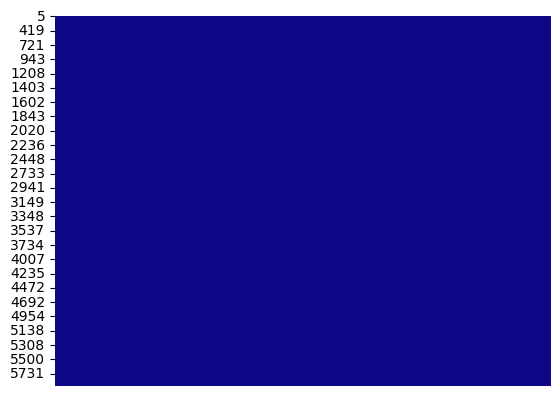

In [ ]:
# Clean selected features

print('All Nulls are in light green\n')

sns.heatmap(hmeq_df.isnull(), xticklabels= False, cbar= False, cmap='plasma')

In [ ]:
hmeq_df

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,...,NINQ_3.0,NINQ_4.0,NINQ_5.0,NINQ_6.0,NINQ_7.0,NINQ_8.0,NINQ_9.0,NINQ_10.0,NINQ_11.0,NINQ_13.0
5,1,1700,30548.0,40320.0,HomeImp,Other,9.0,0.0,0.0,101.466002,...,0,0,0,0,0,0,0,0,0,0
7,1,1800,28502.0,43034.0,HomeImp,Other,11.0,0.0,0.0,88.766030,...,0,0,0,0,0,0,0,0,0,0
19,0,2300,102370.0,120953.0,HomeImp,Office,2.0,0.0,0.0,90.992533,...,0,0,0,0,0,0,0,0,0,0
25,1,2400,34863.0,47471.0,HomeImp,Mgr,12.0,0.0,0.0,70.491080,...,0,0,0,0,0,0,0,0,0,0
26,0,2400,98449.0,117195.0,HomeImp,Office,4.0,0.0,0.0,93.811775,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5955,0,88900,57264.0,90185.0,DebtCon,Other,16.0,0.0,0.0,221.808718,...,0,0,0,0,0,0,0,0,0,0
5956,0,89000,54576.0,92937.0,DebtCon,Other,16.0,0.0,0.0,208.692070,...,0,0,0,0,0,0,0,0,0,0
5957,0,89200,54045.0,92924.0,DebtCon,Other,15.0,0.0,0.0,212.279697,...,0,0,0,0,0,0,0,0,0,0
5958,0,89800,50370.0,91861.0,DebtCon,Other,14.0,0.0,0.0,213.892709,...,0,0,0,0,0,0,0,0,0,0


### Create X and y variables and PCA

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

X = hmeq_df[['LOAN', 'MORTDUE', 'VALUE', 'CLAGE', 'LTV', 'DEBTINC']]

X = StandardScaler().fit_transform(X)

sklearn_pca = PCA(n_components= 1)

hmeq_df['pca-1'] = sklearn_pca.fit_transform(X)

print('Percentage of total variance in the dataset explained by each component.\n', sklearn_pca.explained_variance_ratio_)

Percentage of total variance in the dataset explained by each component.
 [0.36517148]


In [ ]:
hmeq_df.corr()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,...,NINQ_4.0,NINQ_5.0,NINQ_6.0,NINQ_7.0,NINQ_8.0,NINQ_9.0,NINQ_10.0,NINQ_11.0,NINQ_13.0,pca-1
BAD,1.000000,-0.031215,-0.016552,-0.026215,-0.064279,0.253711,0.274893,-0.113906,0.125714,0.007529,...,0.058718,0.078980,0.078133,0.072988,0.033762,0.031489,0.021828,-0.007632,0.055109,-0.007836
LOAN,-0.031215,1.000000,0.272924,0.378724,0.076359,-0.024263,-0.067468,0.066484,0.051264,0.075893,...,0.008632,0.017370,0.061966,0.061499,0.059494,-0.038683,-0.047084,-0.007973,0.002927,0.580553
MORTDUE,-0.016552,0.272924,1.000000,0.865265,-0.103307,-0.042590,-0.035903,0.137741,0.036424,0.320759,...,0.107169,-0.009852,-0.029826,-0.006917,0.001009,-0.041035,-0.033907,-0.000471,0.014420,0.911115
VALUE,-0.026215,0.378724,0.865265,1.000000,-0.021113,-0.045910,-0.068415,0.197697,-0.006878,0.215466,...,0.096077,-0.001818,-0.026043,-0.014730,0.011998,-0.046766,-0.027306,-0.006197,0.009059,0.901860
YOJ,-0.064279,0.076359,-0.103307,-0.021113,1.000000,-0.055824,0.021976,0.230511,-0.045865,-0.001290,...,0.029353,0.003515,-0.019629,-0.028580,-0.004151,-0.035018,0.029874,0.031758,-0.016143,-0.018963
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NINQ_9.0,0.031489,-0.038683,-0.041035,-0.046766,-0.035018,0.010944,0.024563,-0.073593,0.234650,-0.057547,...,-0.006896,-0.004404,-0.003705,-0.003056,-0.002732,1.000000,-0.003254,-0.001114,-0.000787,-0.056666
NINQ_10.0,0.021828,-0.047084,-0.033907,-0.027306,0.029874,0.126639,0.001345,-0.023423,0.412215,-0.018733,...,-0.010762,-0.006873,-0.005782,-0.004770,-0.004264,-0.003254,1.000000,-0.001738,-0.001229,-0.040820
NINQ_11.0,-0.007632,-0.007973,-0.000471,-0.006197,0.031758,-0.006181,-0.008401,0.017829,0.156813,0.003601,...,-0.003683,-0.002352,-0.001979,-0.001632,-0.001459,-0.001114,-0.001738,1.000000,-0.000421,-0.002271
NINQ_13.0,0.055109,0.002927,0.014420,0.009059,-0.016143,-0.004370,-0.005940,-0.017388,0.133124,-0.014907,...,-0.002604,-0.001663,-0.001399,-0.001154,-0.001032,-0.000787,-0.001229,-0.000421,1.000000,0.008491


### PCA does not contribute enough to the BAD varaible

In [ ]:
X = hmeq_df[['LOAN', 'MORTDUE', 'VALUE', 'CLAGE', 'LTV', 'DEBTINC'] + dummy_column_names]

y = hmeq_df['BAD']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= .25, random_state= 42)

### First model is Logistic Regression with l2 regularization and are looking for best parameters for Logistic Regression. We want our model to tune for highest recall because we want to find out if our data can predict whether a home equity loan will default. Finding best parameters for train set.

In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Highest Accuracy
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
grid = dict(solver= solvers, penalty= penalty, C= c_values)
cv = RepeatedStratifiedKFold(n_splits= 10, n_repeats= 3, random_state= 1)
grid_search= GridSearchCV(estimator= model, param_grid= grid, n_jobs= -1, cv= cv, scoring= 'accuracy', error_score= 0)
grid_results= grid_search.fit(X, y)
# Summarize
print("Best: %f using %s" % (grid_results.best_score_, grid_results.best_params_))
means= grid_results.cv_results_['mean_test_score']
stds= grid_results.cv_results_['std_test_score']
params= grid_results.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.925976 using {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.925976 (0.007928) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.911018 (0.001102) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.910820 (0.000130) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.925183 (0.007768) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.911018 (0.001102) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.910820 (0.000130) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.925185 (0.007242) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.911018 (0.001102) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.910820 (0.000130) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.922214 (0.005507) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.911316 (0.001898) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.910820 (0.000130) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.916864 (0.004391) wit

In [ ]:
# Highest recall

model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
grid = dict(solver= solvers, penalty= penalty, C= c_values)
cv = RepeatedStratifiedKFold(n_splits= 10, n_repeats= 3, random_state= 1)
grid_search= GridSearchCV(estimator= model, param_grid= grid, n_jobs= -1, cv= cv, scoring= 'recall', error_score= 0)
grid_results= grid_search.fit(X, y)
# Summarize
print("Best: %f using %s" % (grid_results.best_score_, grid_results.best_params_))
means= grid_results.cv_results_['mean_test_score']
stds= grid_results.cv_results_['std_test_score']
params= grid_results.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.211111 using {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.211111 (0.083148) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.004444 (0.023934) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.000000 (0.000000) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.207778 (0.084188) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.004444 (0.023934) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.000000 (0.000000) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.196667 (0.073711) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.004444 (0.023934) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.000000 (0.000000) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.128889 (0.061904) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.006667 (0.024944) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.000000 (0.000000) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.067778 (0.049053) wit

### Second model is Random Forest Classifier finding best parameters to run for train set.

In [ ]:
# Highest Accuracy

model = RandomForestClassifier()
n_estimators = [10, 100, 1000]
max_features = ['sqrt', 'log2']
grid = dict(n_estimators=n_estimators, max_features= max_features)
cv = RepeatedStratifiedKFold(n_splits= 10, n_repeats= 3, random_state= 2)
grid_search = GridSearchCV(estimator= model, param_grid= grid, n_jobs= -1, cv= cv, scoring= 'accuracy', error_score= 0)
grid_results= grid_search.fit(X, y)

# Summarize the results
print('Best: %f using %s' % (grid_results.best_score_, grid_results.best_params_))
means = grid_results.cv_results_['mean_test_score']
stds = grid_results.cv_results_['std_test_score']
params = grid_results.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.940644 using {'max_features': 'sqrt', 'n_estimators': 1000}
0.938166 (0.007706) with: {'max_features': 'sqrt', 'n_estimators': 10}
0.940149 (0.007561) with: {'max_features': 'sqrt', 'n_estimators': 100}
0.940644 (0.007748) with: {'max_features': 'sqrt', 'n_estimators': 1000}
0.934898 (0.007544) with: {'max_features': 'log2', 'n_estimators': 10}
0.939058 (0.007212) with: {'max_features': 'log2', 'n_estimators': 100}
0.938564 (0.007301) with: {'max_features': 'log2', 'n_estimators': 1000}


In [ ]:
model = RandomForestClassifier()
n_estimators = [10, 100, 1000]
max_features = ['sqrt', 'log2']
grid = dict(n_estimators=n_estimators, max_features= max_features)
cv = RepeatedStratifiedKFold(n_splits= 10, n_repeats= 3, random_state= 2)
grid_search = GridSearchCV(estimator= model, param_grid= grid, n_jobs= -1, cv= cv, scoring= 'recall', error_score= 0)
grid_results= grid_search.fit(X, y)

# Summarize the results
print('Best: %f using %s' % (grid_results.best_score_, grid_results.best_params_))
means = grid_results.cv_results_['mean_test_score']
stds = grid_results.cv_results_['std_test_score']
params = grid_results.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.338889 using {'max_features': 'sqrt', 'n_estimators': 100}
0.322222 (0.093624) with: {'max_features': 'sqrt', 'n_estimators': 10}
0.338889 (0.080776) with: {'max_features': 'sqrt', 'n_estimators': 100}
0.334444 (0.084100) with: {'max_features': 'sqrt', 'n_estimators': 1000}
0.287778 (0.074278) with: {'max_features': 'log2', 'n_estimators': 10}
0.308889 (0.079784) with: {'max_features': 'log2', 'n_estimators': 100}
0.307778 (0.078260) with: {'max_features': 'log2', 'n_estimators': 1000}


### Third model is Gradient Boosting Classifier finding best parameters to run train set.

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

model= GradientBoostingClassifier()
learning_rate= [0.1]
subsample = [0.7, 1]
n_estimators = [100, 1000]
max_features = [0.3, 0.35, 0.4]
max_depth = [4, 7, 9]
grid= dict(learning_rate= learning_rate, n_estimators= n_estimators, subsample= subsample, max_features= max_features, max_depth= max_depth)
cv= RepeatedStratifiedKFold(n_splits= 5, n_repeats= 3, random_state= 2)
grid_search= GridSearchCV(estimator= model, param_grid= grid, n_jobs= -1, cv= cv, scoring= 'accuracy', error_score= 0)
grid_results= grid_search.fit(X, y)
# Summarize
print("Best: %f using %s" % (grid_results.best_score_, grid_results.best_params_))
means= grid_results.cv_results_['mean_test_score']
stds= grid_results.cv_results_['std_test_score']
params= grid_results.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.946690 using {'learning_rate': 0.1, 'max_depth': 7, 'max_features': 0.35, 'n_estimators': 1000, 'subsample': 0.7}
0.940944 (0.004677) with: {'learning_rate': 0.1, 'max_depth': 4, 'max_features': 0.3, 'n_estimators': 100, 'subsample': 0.7}
0.938962 (0.005699) with: {'learning_rate': 0.1, 'max_depth': 4, 'max_features': 0.3, 'n_estimators': 100, 'subsample': 1}
0.945997 (0.005305) with: {'learning_rate': 0.1, 'max_depth': 4, 'max_features': 0.3, 'n_estimators': 1000, 'subsample': 0.7}
0.945799 (0.005143) with: {'learning_rate': 0.1, 'max_depth': 4, 'max_features': 0.3, 'n_estimators': 1000, 'subsample': 1}
0.941142 (0.006223) with: {'learning_rate': 0.1, 'max_depth': 4, 'max_features': 0.35, 'n_estimators': 100, 'subsample': 0.7}
0.942133 (0.004418) with: {'learning_rate': 0.1, 'max_depth': 4, 'max_features': 0.35, 'n_estimators': 100, 'subsample': 1}
0.946592 (0.005597) with: {'learning_rate': 0.1, 'max_depth': 4, 'max_features': 0.35, 'n_estimators': 1000, 'subsample': 0.7}
0.9

In [ ]:
# Highest Recall Value

model= GradientBoostingClassifier()
learning_rate= [0.1]
subsample = [0.7, 1]
n_estimators = [100, 1000]
max_depth = [4, 7, 9]
max_features = [0.3, 0.35, 0.4]
grid= dict(learning_rate= learning_rate, n_estimators= n_estimators, subsample= subsample, max_depth= max_depth, max_features= max_features)
cv= RepeatedStratifiedKFold(n_splits= 5, n_repeats= 3, random_state= 2)
grid_search= GridSearchCV(estimator= model, param_grid= grid, n_jobs= -1, cv= cv, scoring= 'recall', error_score= 0)
grid_results= grid_search.fit(X, y)
# Summarize
print("Best: %f using %s" % (grid_results.best_score_, grid_results.best_params_))
means= grid_results.cv_results_['mean_test_score']
stds= grid_results.cv_results_['std_test_score']
params= grid_results.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.455556 using {'learning_rate': 0.1, 'max_depth': 4, 'max_features': 0.3, 'n_estimators': 1000, 'subsample': 0.7}
0.386667 (0.052068) with: {'learning_rate': 0.1, 'max_depth': 4, 'max_features': 0.3, 'n_estimators': 100, 'subsample': 0.7}
0.384444 (0.049616) with: {'learning_rate': 0.1, 'max_depth': 4, 'max_features': 0.3, 'n_estimators': 100, 'subsample': 1}
0.455556 (0.055333) with: {'learning_rate': 0.1, 'max_depth': 4, 'max_features': 0.3, 'n_estimators': 1000, 'subsample': 0.7}
0.441111 (0.059587) with: {'learning_rate': 0.1, 'max_depth': 4, 'max_features': 0.3, 'n_estimators': 1000, 'subsample': 1}
0.394444 (0.037351) with: {'learning_rate': 0.1, 'max_depth': 4, 'max_features': 0.35, 'n_estimators': 100, 'subsample': 0.7}
0.386667 (0.065036) with: {'learning_rate': 0.1, 'max_depth': 4, 'max_features': 0.35, 'n_estimators': 100, 'subsample': 1}
0.443333 (0.063770) with: {'learning_rate': 0.1, 'max_depth': 4, 'max_features': 0.35, 'n_estimators': 1000, 'subsample': 0.7}
0.44

In [ ]:
def plot_confusion_matrix(cm, classes,normalize,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center", verticalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

### Logistic regression training and test scores

In [ ]:
# Confusion Matrix of Best Models using train and testing sets

lr = LogisticRegression(solver= 'newton-cg', penalty= 'l2', C= 100)
lr.fit(X_train, y_train)

predict_test = lr.predict(X_test)

lr.score(X_test, y_test)

0.929845422116528

In [ ]:
precision_score(y_test, predict_test)

0.8235294117647058

In [ ]:
recall_score(y_test, predict_test)

0.2

Confusion matrix, without normalization


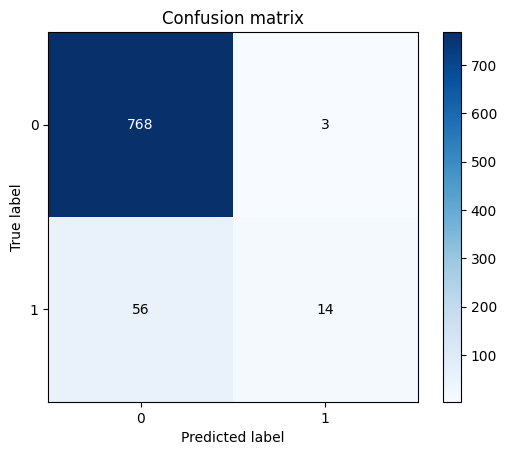

In [ ]:
cm = confusion_matrix(y_test, predict_test)
plot_confusion_matrix(cm,[0,1],False)

Normalized confusion matrix


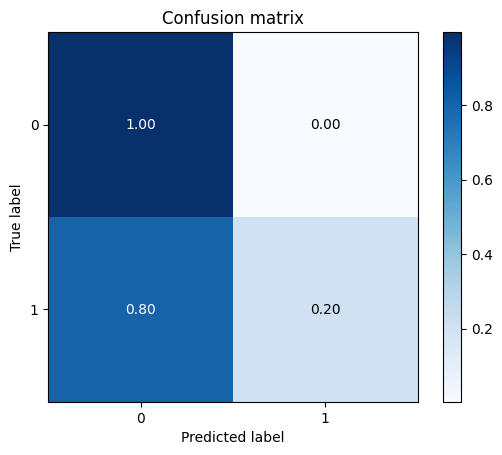

In [ ]:
cm = confusion_matrix(y_test, predict_test)
plot_confusion_matrix(cm,[0,1],True)

### Random Forest training and test set scores

In [ ]:
rfc = RandomForestClassifier(max_features= 'sqrt', n_estimators= 1000)
rfc.fit(X_train, y_train)

predict_test = rfc.predict(X_test)

rfc.score(X_test, y_test)

0.9417360285374554

In [ ]:
precision_score(y_test, predict_test)

1.0

In [ ]:
recall_score(y_test, predict_test)

0.3

Confusion matrix, without normalization


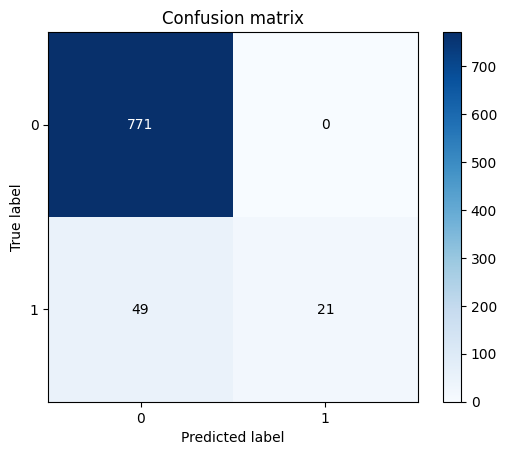

In [ ]:
cm = confusion_matrix(y_test, predict_test)
plot_confusion_matrix(cm, [0,1],False)

Normalized confusion matrix


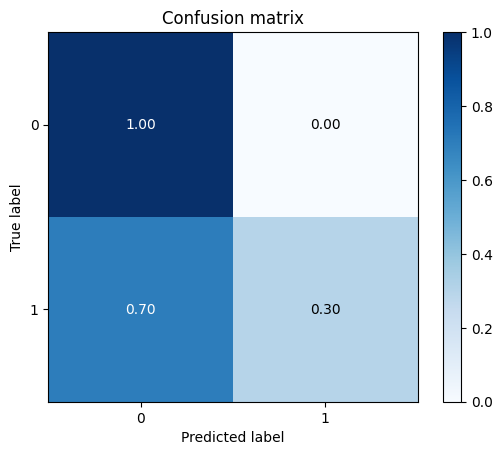

In [ ]:
cm = confusion_matrix(y_test, predict_test)
plot_confusion_matrix(cm, [0,1],True)

### Third model is Gradient Boosting Classifier with tuned parameters to maximize our accuracy and recall score on the training and test sets

In [ ]:
# You'll make 1000 iterations, use 4-deep trees, and set your loss function.

# It's best to update this table for the drill
# at the end of the lesson.
from sklearn.ensemble import GradientBoostingClassifier

params = {'n_estimators': 1000,
          'max_depth': 4,
          'loss': 'log_loss',
          'subsample': 0.7,
          'max_features': 0.3,
          'learning_rate' : 0.1}

# Initialize and fit the model.
clf = GradientBoostingClassifier(**params)
clf.fit(X_train, y_train)

predict_test = clf.predict(X_test)

clf.score(X_test, y_test)

0.9524375743162902

In [ ]:
precision_score(y_test, predict_test)

0.96875

In [ ]:
recall_score(y_test, predict_test)

0.44285714285714284

Confusion matrix, without normalization


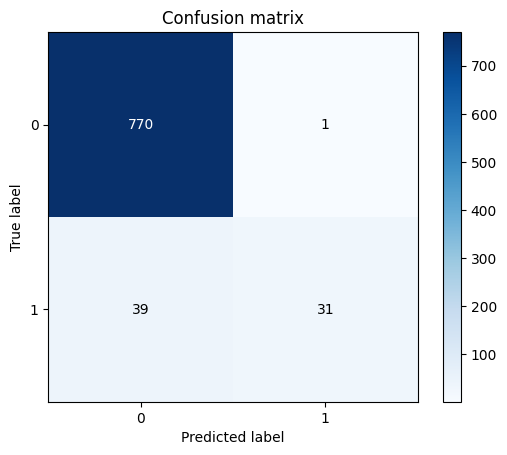

In [ ]:
cm = confusion_matrix(y_test, predict_test)
plot_confusion_matrix(cm,[0,1],False)

Normalized confusion matrix


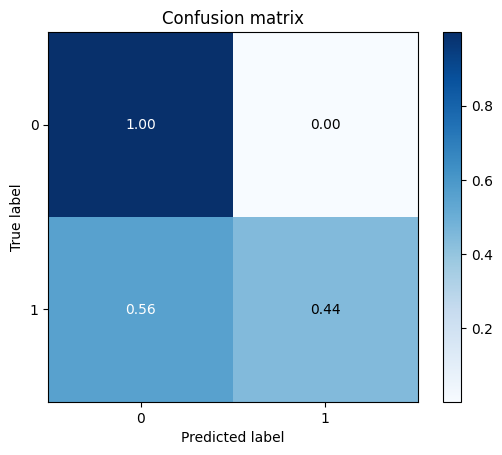

In [ ]:
cm = confusion_matrix(y_test, predict_test)
plot_confusion_matrix(cm, [0, 1], True)

### Considering the limited amount of data we obtained we managed to get a recall score around 45% and an accuracy around 95.2% which is good considering the amount of data we obtained.

<Axes: >

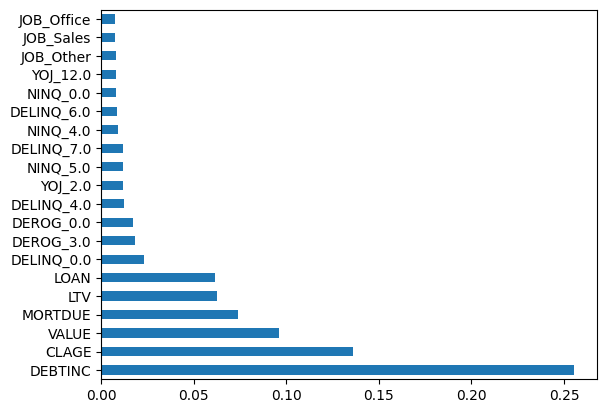

In [ ]:
feat_importances = pd.Series(clf.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')

### Our best model by far was the Gradient boosting model which performed decently well with the amount of data we obtained. Our precision was near 100% and our recall around 45%. More data could lead to better models and have an even greater efect on whether banks should approve home equity loans for customers. Thank you for looking over more analysis and I hope this was insightful and interesting.